In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("res/pos.csv")

length = 228.30688
width = 346.92673
height = 13.0
offsetX = 14.67
offsetY = 21.18
imageWidth = 4162
imageHeight = 2739

ids = df['id'].unique()

print(ids)

df

['00:fa:b6:04:00:0e']


,id,time,floorNumber,x,y,confidence,deviceType
0,00:fa:b6:04:00:0e,1711020178000,1,234.3,94.5,40.0,NaN
1,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
2,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
3,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
4,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
...,...,...,...,...,...,...,...
862,00:fa:b6:04:00:0e,1711020976000,1,233.3,96.7,32.0,NaN
863,00:fa:b6:04:00:0e,1711020976000,1,233.3,96.7,32.0,NaN
864,00:fa:b6:04:00:0e,1711020978000,1,233.3,96.7,32.0,NaN
865,00:fa:b6:04:00:0e,1711020978000,1,233.3,96.7,32.0,NaN


In [91]:
df[df['x'] != 0]

,id,time,floorNumber,x,y,confidence,deviceType
0,00:fa:b6:04:00:0e,1711020178000,1,234.3,94.5,40.0,NaN
1,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
2,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
3,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
4,00:fa:b6:04:00:0e,1711020181000,1,234.3,94.5,32.0,NaN
...,...,...,...,...,...,...,...
862,00:fa:b6:04:00:0e,1711020976000,1,233.3,96.7,32.0,NaN
863,00:fa:b6:04:00:0e,1711020976000,1,233.3,96.7,32.0,NaN
864,00:fa:b6:04:00:0e,1711020978000,1,233.3,96.7,32.0,NaN
865,00:fa:b6:04:00:0e,1711020978000,1,233.3,96.7,32.0,NaN


In [92]:
time_series = df[df['id'] == ids[0]]['time']
time_series = pd.to_datetime(time_series, unit='ms')
time_series 

0     2024-03-21 11:22:58
1     2024-03-21 11:23:01
2     2024-03-21 11:23:01
3     2024-03-21 11:23:01
4     2024-03-21 11:23:01
              ...        
862   2024-03-21 11:36:16
863   2024-03-21 11:36:16
864   2024-03-21 11:36:18
865   2024-03-21 11:36:18
866   2024-03-21 11:36:18
Name: time, Length: 867, dtype: datetime64[ns]

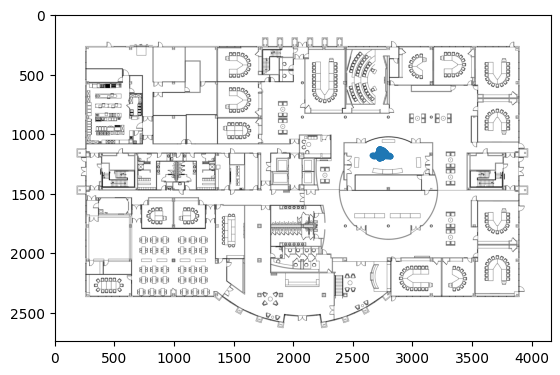

In [93]:

# df = df[df['confidence'] < 100]

df = df[df['id'] == ids[0]]
for id in ids:
  data = df[df['id'] == id]
  datax = data['x'].rolling(window=10).mean()
  datay = data['y'].rolling(window=10).mean()
  datax = (datax + offsetX) / (width + 2 * offsetX) * imageWidth
  datay = (datay + offsetY) / (length + 2 * offsetY) * imageHeight
  plt.plot(datax, datay, label=id, marker='o', linestyle='-', markersize=3)

plt.imshow(plt.imread('res/floor1.png'))
plt.savefig('plot.png', dpi=300)
